In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import random

import matplotlib

plt.style.use('seaborn-whitegrid')
matplotlib.rcParams.update({
    'font.family': 'serif',
    'axes.titlesize':16,
    'axes.labelsize':16,
    'axes.xmargin':0.1,
    'axes.ymargin':0.1,
    'legend.fontsize':16,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'lines.markersize': 10,
    'lines.linewidth' : 3,
    'font.size': 16
})






In [2]:
#Import Data
raw_data=pd.read_csv("../data/processed/gathered.csv",index_col=False )

# Add column to identify available time series (i.e walks where as WalkId=SubjectIdRunId) 
subject_id=raw_data['SubjectId'].values
run_id=raw_data['RunId'].values
walk = [str(int(i)) + '-' + str(int(j)) for i, j in zip(subject_id, run_id)]
raw_data['walk']=walk

In [3]:
# Extract individual walks
walks=list(raw_data.drop_duplicates(subset=['walk'])['walk'].values)
print('No. of available walks (time series) in the dataset is {} performed by {} subjects'.format(len(walks),len(set(subject_id))))

No. of available walks (time series) in the dataset is 46 performed by 24 subjects


# Identify time discontinuity in walks

In [4]:
lags=[]
for walk in walks:
    walk_data=raw_data[raw_data['walk']==walk]
    stamps=walk_data['stamp'].values
    diff=np.diff(stamps)
    time_lag=np.where(diff<0.015,0,diff )
    lag_idx=np.nonzero(time_lag)
    lags.append(lag_idx)
    if time_lag.sum()>0:
        print('{} discontinuity detected in walk: {} at indices: {} with lags {} sec'.format(len(lag_idx[0]),walk, list(lag_idx[0]), list(time_lag[lag_idx[0]])))
        # Drop data beyond the first discontinuity 
        walk_idx=np.array(walk_data.index)
        sliced_walk=walk_idx[lag_idx[0][0]:] #sliced from the first discontinuity to the end 
        raw_data=raw_data.drop(sliced_walk) #drop the sliced data drm the raw data
        print('{} samples dropped to eliminate discontinuity in walk {}!'.format(len(sliced_walk),walk))
         


1 discontinuity detected in walk: 52-2 at indices: [46399] with lags [7.009999990463257] sec
100 samples dropped to eliminate discontinuity in walk 52-2!
1 discontinuity detected in walk: 78-1 at indices: [41599] with lags [1.0099999904632568] sec
100 samples dropped to eliminate discontinuity in walk 78-1!
1 discontinuity detected in walk: 78-2 at indices: [13699] with lags [2.009999990463257] sec
100 samples dropped to eliminate discontinuity in walk 78-2!
1 discontinuity detected in walk: 145-1 at indices: [57699] with lags [51.00999999046326] sec
100 samples dropped to eliminate discontinuity in walk 145-1!
1 discontinuity detected in walk: 161-3 at indices: [21199] with lags [12.009999990463257] sec
400 samples dropped to eliminate discontinuity in walk 161-3!
1 discontinuity detected in walk: 181-2 at indices: [55699] with lags [1.0099999904632568] sec
5400 samples dropped to eliminate discontinuity in walk 181-2!
1 discontinuity detected in walk: 290-1 at indices: [49699] with l

In [5]:
for walk in walks:
    walk_data=raw_data[raw_data['walk']==walk]
    print("Walk {} has {} samples ".format(walk, len(walk_data)))
print('Total number of samples is {}'.format(len(raw_data)))

Walk 52-1 has 52450 samples 
Walk 52-2 has 46399 samples 
Walk 78-1 has 41599 samples 
Walk 78-2 has 13699 samples 
Walk 145-1 has 57699 samples 
Walk 145-2 has 45899 samples 
Walk 161-1 has 34300 samples 
Walk 161-2 has 30300 samples 
Walk 161-3 has 21199 samples 
Walk 181-2 has 55699 samples 
Walk 290-1 has 49699 samples 
Walk 290-2 has 46999 samples 
Walk 298-1 has 41800 samples 
Walk 298-2 has 32399 samples 
Walk 314-1 has 39499 samples 
Walk 314-2 has 32799 samples 
Walk 317-1 has 37299 samples 
Walk 339-1 has 25900 samples 
Walk 339-2 has 19299 samples 
Walk 390-1 has 21549 samples 
Walk 390-2 has 13199 samples 
Walk 473-1 has 53099 samples 
Walk 473-2 has 43271 samples 
Walk 481-1 has 49999 samples 
Walk 481-2 has 42599 samples 
Walk 491-1 has 208099 samples 
Walk 491-2 has 30399 samples 
Walk 527-1 has 17899 samples 
Walk 527-2 has 19499 samples 
Walk 733-1 has 49399 samples 
Walk 733-2 has 36350 samples 
Walk 806-1 has 39550 samples 
Walk 806-2 has 34749 samples 
Walk 863-1 ha

# Plotting randomly selected walks

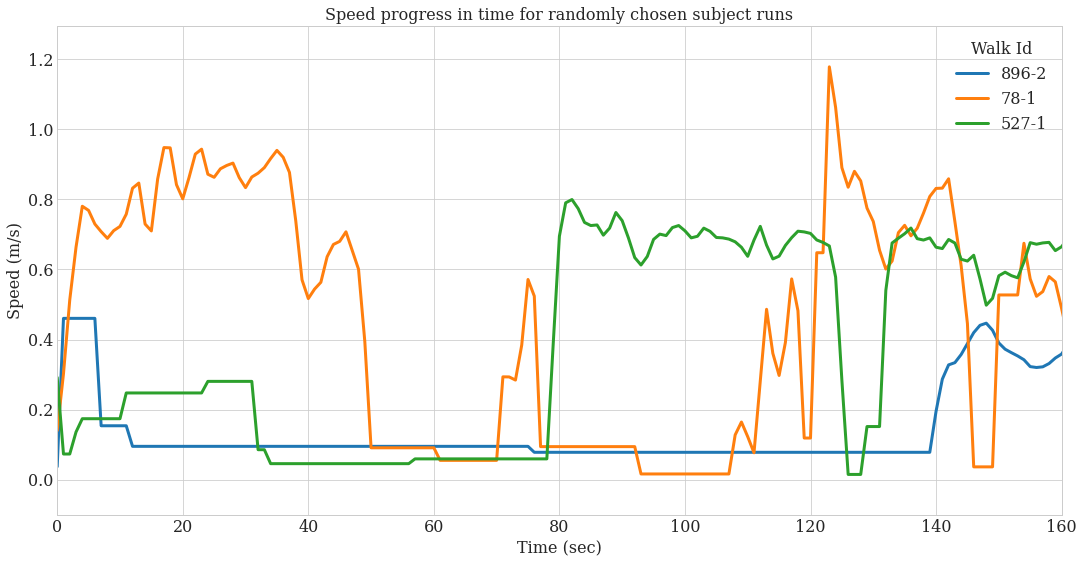

In [6]:
plt.rcParams["figure.figsize"] = (18,9)
# Plotting randomly selected walks
speed=[]
random.seed(10)
selected_walks=random.sample(walks,3)
for walk in selected_walks:
    walk_data=raw_data[raw_data['walk']==walk]
    walk_speed=walk_data['speed'].values
    walk_speed=walk_speed[::100] #downsampled 100Hz to 1Hz
    speed.append(walk_speed)

fig, ax=plt.subplots(nrows=1,ncols=1)
ax.set_xlim([0,160])
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Speed (m/s)')
for walk_name,walk_speed in zip(selected_walks,speed):
    ax.plot(walk_speed, label=walk_name)
ax.legend(title="Walk Id", fancybox=True) #WalkId=SubjectId-RunId
ax.set_title('Speed progress in time for randomly chosen subject runs')  
plt.savefig("../reports/figures/walk_vs_time.png") 

# Visualize acceleration Distribution in SPACE for randomly selected speeds

In [7]:
# Extract available speeds
speeds=raw_data.drop_duplicates(subset=['speed'])
speeds=list(speeds['speed'].values)
print('No. of available distinct speeds {}'.format(len(speeds)))

No. of available distinct speeds 12256


In [92]:
random.seed(10)
sel_speeds=random.sample(speeds,5)
# Extract accelration data corresponding to each selected speed 
sel_accls=[]
for speed in sel_speeds:
    accls=raw_data[raw_data['speed']==speed]
    accls=accls.drop(['stamp','SubjectId','RunId'], axis=1).values
    sel_accls.append(accls)



In [94]:
from scipy.stats import norm
def plt_dist(arr, speed):
    arr=np.array(arr, dtype=float)
    mu, std = norm.fit(arr)
    x=np.linspace(arr.min(), arr.max(), 100)
    p=norm.pdf(x,mu,std)
    plt.plot(x, p, linewidth=2, label=(" %.3f"%(speed)))


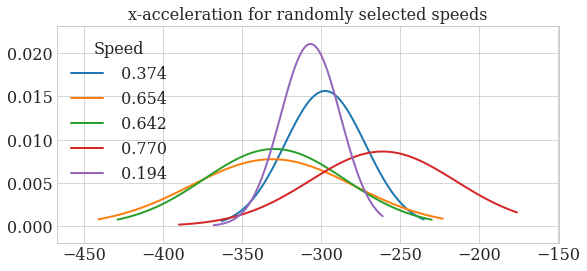

In [95]:
plt.rcParams["figure.figsize"] = (9,4)
plt.title('x-acceleration for randomly selected speeds')
for i, speed in enumerate(sel_speeds):
    plt_dist(sel_accls[i][:,0], speed)
plt.legend(title='Speed')

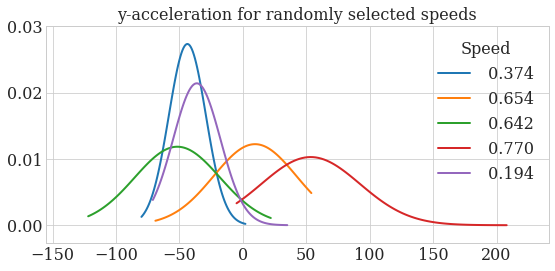

In [97]:
plt.title('y-acceleration for randomly selected speeds')
for i, speed in enumerate(sel_speeds):
    plt_dist(sel_accls[i][:,1], speed)
plt.legend(title='Speed')

In [ ]:
plt.title('z-acceleration for randomly selected speeds')
for i, speed in enumerate(sel_speeds):
    plt_dist(sel_accls[i][:,2], speed)
plt.legend(title='Speed')